<a href="https://colab.research.google.com/github/Arjun650/MachineLearning/blob/main/lab_02Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [2]:
data = pd.read_csv('/content/drive/MyDrive/team01.csv')
print(data.head(10))


  Timestamp     Speaker                               Transcript      Label
0  00:00:02   Speaker 1                                Yes, Sir.  Statement
1  00:00:05   Speaker 1                                     And.  Statement
2  00:00:07   Speaker 1             Then we go to with that, OK.  Statement
3  00:00:10   Speaker 1                                 OK, Sir.  Statement
4  00:00:11   Speaker 1                                    Yeah.  Statement
5  00:00:13   Speaker 1           Itself is all new to yourself.  Statement
6  00:00:19   Speaker 2                                      OK   Statement
7  01:00:19   Speaker 1                                       OK  Statement
8  00:00:23   Speaker 2  Can you tell me name of one classifier?   Question
9  00:00:27   Speaker 3           Which is non linear in nature.   Question


In [3]:
data.columns

Index(['Timestamp', 'Speaker', 'Transcript', 'Label'], dtype='object')

In [4]:
vectorizer = TfidfVectorizer() # Initialize TF-IDF Vectorizer

X = vectorizer.fit_transform(data['Transcript']) # Fit and transform the

data_array = X.toarray() # Convert the result into an array

feature_names = vectorizer.get_feature_names_out() # Get the feature names (words)

df = pd.DataFrame(data_array, columns=feature_names)
print(df)

    able  actual  actually  all   an       and       are  baidu  beaches  \
0    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
1    0.0     0.0  0.000000  0.0  0.0  1.000000  0.000000    0.0      0.0   
2    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
3    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
4    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
..   ...     ...       ...  ...  ...       ...       ...    ...      ...   
60   0.0     0.0  0.000000  0.0  0.0  0.000000  0.346022    0.0      0.0   
61   0.0     0.0  0.000000  0.0  0.0  0.249307  0.000000    0.0      0.0   
62   0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
63   0.0     0.0  0.384093  0.0  0.0  0.000000  0.000000    0.0      0.0   
64   0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   

     because  ...      what  when     which  why      will      with  yeah  \
0   0.000

In [5]:
X_statements = data_array[data['Label'] == 'Statement']
X_questions = data_array[data['Label'] == 'Question']
X_answers = data_array[data['Label'] == 'Answer']

In [6]:
centroid_statements = np.mean(X_statements, axis=0)
centroid_questions = np.mean(X_questions, axis=0)
centroid_answers = np.mean(X_answers, axis=0)

In [7]:
std_statements = np.std(X_statements, axis=0)
std_questions = np.std(X_questions, axis=0)
std_answers = np.std(X_answers, axis=0)

print(f"Standard Deviation for Statements: {std_statements}")
print(f"Standard Deviation for Questions: {std_questions}")
print(f"Standard Deviation for Answers: {std_answers}")

Standard Deviation for Statements: [0.         0.         0.         0.08180835 0.         0.18246561
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.116881   0.         0.         0.
 0.14708501 0.         0.1200758  0.         0.         0.
 0.11394416 0.         0.1934358  0.         0.         0.
 0.12541445 0.         0.04775324 0.         0.08180835 0.
 0.07354251 0.         0.         0.         0.07861532 0.
 0.         0.12902267 0.         0.         0.09991959 0.
 0.         0.         0.         0.         0.         0.
 0.116881   0.08180835 0.16461347 0.         0.         0.
 0.         0.         0.18246561 0.4447958  0.         0.
 0.         0.         0.         0.         0.         0.
 0.13496418 0.         0.         0.         0.         0.
 0.         0.12902267 0.         0.         0.         0.27112046
 0.18246561 0.         0.         0.         0.         0.
 0.  

In [8]:
# Distance between Statements and Questions
distance_statements_questions = np.linalg.norm(centroid_statements - centroid_questions)

# Distance between Statements and Answers
distance_statements_answers = np.linalg.norm(centroid_statements - centroid_answers)

# Distance between Questions and Answers
distance_questions_answers = np.linalg.norm(centroid_questions - centroid_answers)

print(f"Distance between Statements and Questions: {distance_statements_questions}")
print(f"Distance between Statements and Answers: {distance_statements_answers}")
print(f"Distance between Questions and Answers: {distance_questions_answers}")

Distance between Statements and Questions: 0.5155837071618682
Distance between Statements and Answers: 0.5102081749598664
Distance between Questions and Answers: 0.4117130528016514


In [9]:
feature_index = 16
selected_feature = data_array[:, feature_index]

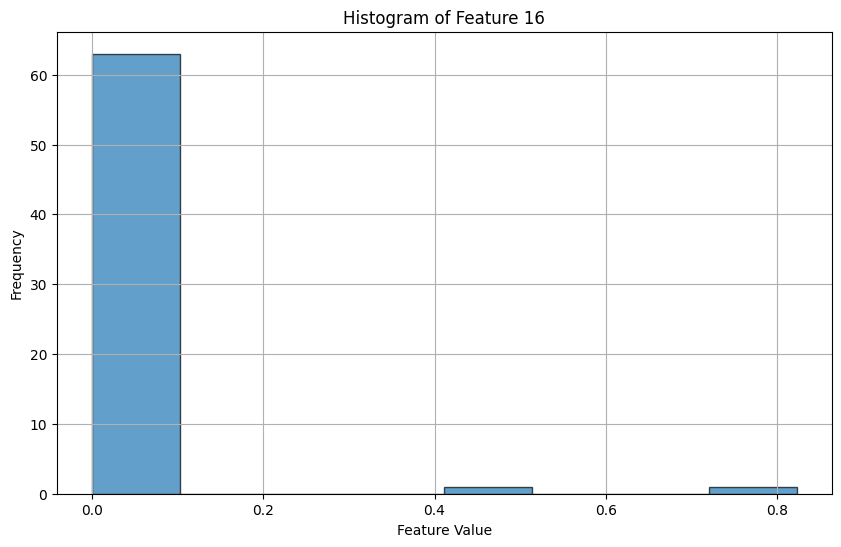

In [10]:
# Calculate histogram data
hist, bins = np.histogram(selected_feature, bins='auto')  # You can specify the number of bins or use 'auto'

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(selected_feature, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature {}'.format(feature_index))
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
# Calculate the mean and variance of the selected feature
mean = np.mean(selected_feature)
variance = np.var(selected_feature)

print(f"Mean of Feature {feature_index}: {mean:.2f}")
print(f"Variance of Feature {feature_index}: {variance:.2f}")


Mean of Feature 16: 0.02
Variance of Feature 16: 0.01


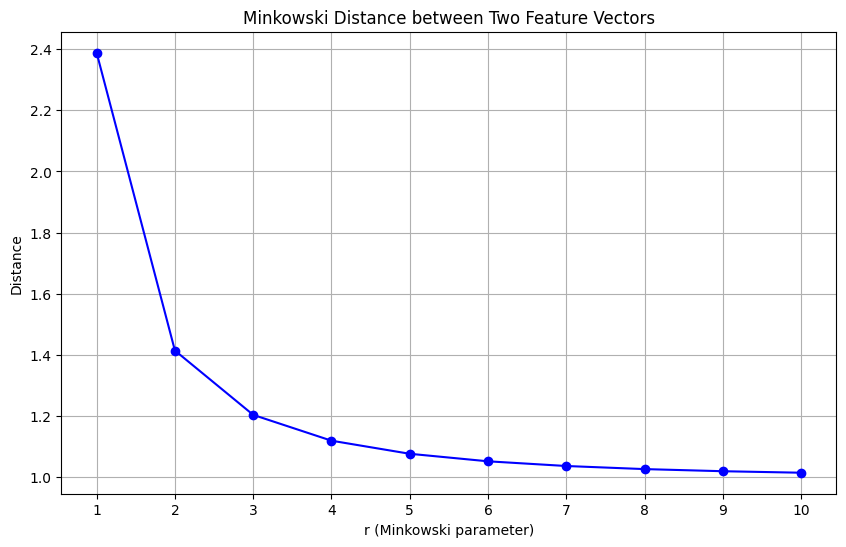

In [12]:
feature_vector_1 = data_array[0]
feature_vector_2 = data_array[1]

# Function to calculate Minkowski distance
def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

# Compute distances for r from 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski_distance(feature_vector_1, feature_vector_2, r) for r in r_values]

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Minkowski parameter)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

In [17]:

# Ensure you have only two classes for this example
data_two_classes = data[data['Label'].isin(['Statement', 'Question'])]

# Prepare features and labels
X = vectorizer.transform(data_two_classes['Transcript'])
y = data_two_classes['Label']

# Convert X to array for consistency with previous code
data_array = X.toarray()

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_array, y, test_size=0.3, random_state=42)

# Print shapes of the resulting datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (33, 122)
X_test shape: (15, 122)
y_train shape: (33,)
y_test shape: (15,)


In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
neigh.fit(X_train, y_train)

# Optionally, you can check the accuracy on the training set (optional)
train_accuracy = neigh.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.2f}")

Training accuracy: 0.94


In [19]:
# Assuming the model has already been trained
# Predict classes for the entire test set
predictions = neigh.predict(X_test)

# Print the first few predictions to see how they look
print("Predictions for the test set:", predictions[:10])

# Classify a specific test vector (e.g., the first test vector in the test set)
test_vect = X_test[0]  # You can choose any vector from X_test
predicted_class = neigh.predict([test_vect])

print(f"Class for the test vector: {predicted_class[0]}")

Predictions for the test set: ['Statement' 'Question' 'Statement' 'Statement' 'Question' 'Statement'
 'Question' 'Question' 'Statement' 'Statement']
Class for the test vector: Statement


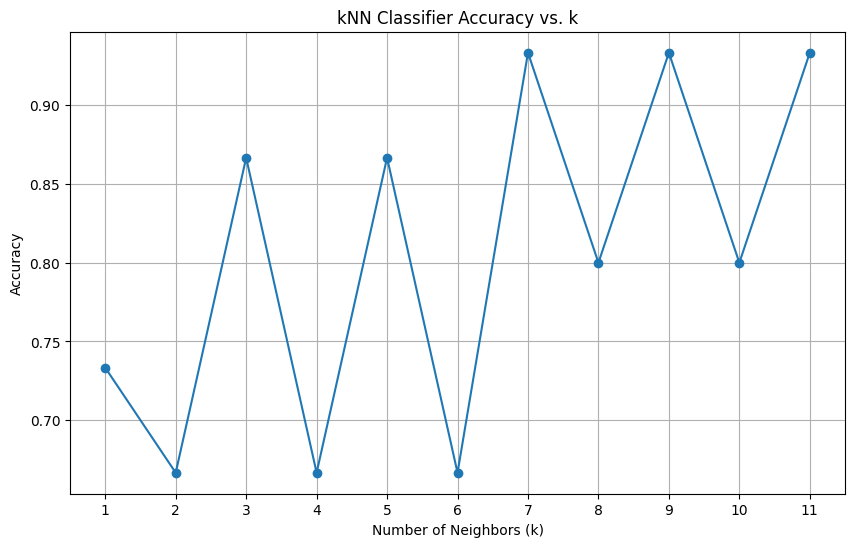

In [20]:
# Initialize lists to store results
k_values = range(1, 12)  # k from 1 to 11
accuracies = []

# Train and evaluate kNN classifiers for each k
for k in k_values:
    # Initialize the kNN classifier with the current k
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    predictions = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Classifier Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [23]:
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"Confusion Matrix for {dataset_name} Data:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")

# Predict on training data
train_predictions = neigh.predict(X_train)

# Predict on test data
test_predictions = neigh.predict(X_test)

# Evaluate model performance
evaluate_model(y_train, train_predictions, "Training")
evaluate_model(y_test, test_predictions, "Test")

Confusion Matrix for Training Data:
[[12  2  1]
 [ 3  8  0]
 [ 3  3 13]]

Classification Report:
              precision    recall  f1-score   support

      Answer       0.67      0.80      0.73        15
    Question       0.62      0.73      0.67        11
   Statement       0.93      0.68      0.79        19

    accuracy                           0.73        45
   macro avg       0.74      0.74      0.73        45
weighted avg       0.76      0.73      0.74        45

Accuracy: 0.73
Confusion Matrix for Test Data:
[[2 0 0]
 [4 4 0]
 [3 2 5]]

Classification Report:
              precision    recall  f1-score   support

      Answer       0.22      1.00      0.36         2
    Question       0.67      0.50      0.57         8
   Statement       1.00      0.50      0.67        10

    accuracy                           0.55        20
   macro avg       0.63      0.67      0.53        20
weighted avg       0.79      0.55      0.60        20

Accuracy: 0.55


**`bold text`** Lab_04 Assignment

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform train_predictions using the same encoder
train_predictions_encoded = label_encoder.transform(train_predictions)

# Calculate MSE, RMSE, MAPE, and R2 Score using encoded labels
mse = mean_squared_error(y_train_encoded, train_predictions_encoded)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train_encoded, train_predictions_encoded)
r2 = r2_score(y_train_encoded, train_predictions_encoded)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


Mean Squared Error (MSE): 0.53
Root Mean Squared Error (RMSE): 0.73
Mean Absolute Percentage Error (MAPE): 400319966877377.62
R-squared (R²) Score: 0.29


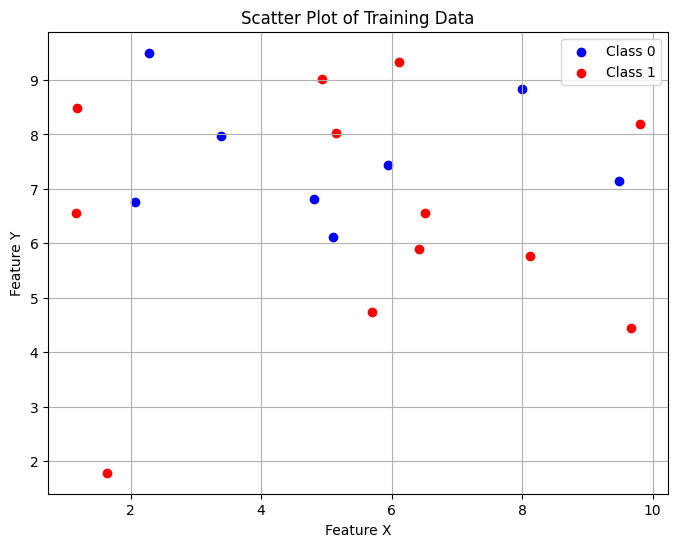

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Generate 20 random data points for X and Y
X = np.random.uniform(1, 10, size=(20, 2))
# Randomly assign classes: 0 (Blue) or 1 (Red)
y = np.random.choice([0, 1], size=20)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot points for class 0
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')

# Plot points for class 1
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Add labels and title
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


<ipython-input-39-e8c4e06f8143>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_classes))


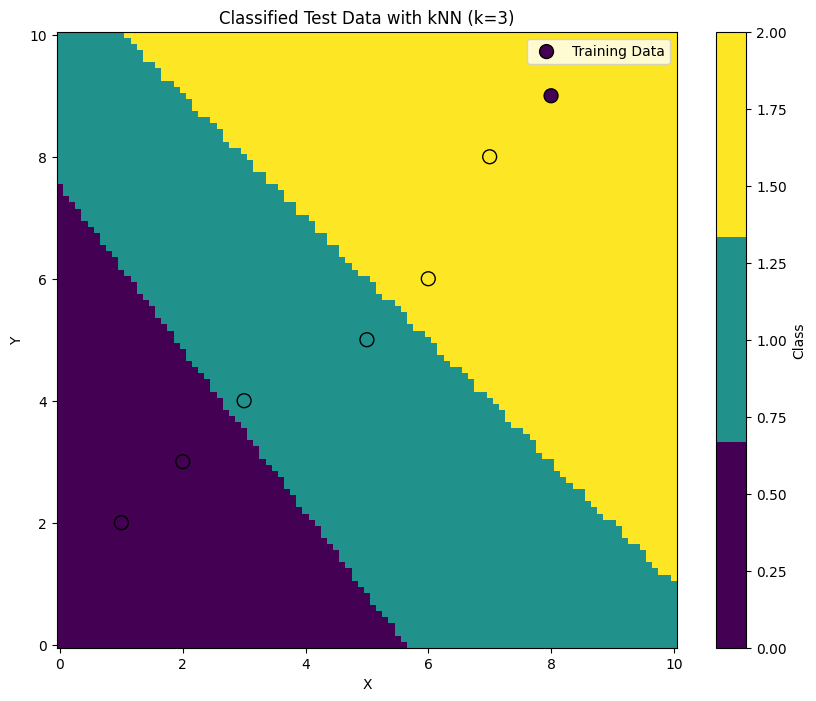

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Example training data (replace with your actual training data)
# Replace these example arrays with your actual feature data and labels
X_train = np.array([
    [1, 2], [2, 3], [3, 4], [5, 5], [6, 6], [7, 8], [8, 9]
])  # Example feature data
y_train = np.array([
    'Class0', 'Class0', 'Class1', 'Class1', 'Class2', 'Class2', 'Class0'
])  # Example labels

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and train the kNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train_encoded)

# Generate test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X, Y = np.meshgrid(x_values, y_values)
test_data = np.c_[X.ravel(), Y.ravel()]

# Classify the test data
predictions_encoded = knn.predict(test_data)

# Reshape predictions to match the grid shape
predicted_classes = predictions_encoded.reshape(X.shape)

# Create a color map for classes
unique_classes = np.unique(predictions_encoded)
cmap = plt.cm.get_cmap('viridis', len(unique_classes))

# Plot the results
plt.figure(figsize=(10, 8))
plt.pcolormesh(X, Y, predicted_classes, shading='auto', cmap=cmap, edgecolors='none')

# Add scatter plot of the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, edgecolor='k', cmap=cmap, marker='o', s=100, label='Training Data')

# Add labels and title
plt.colorbar(label='Class')
plt.title('Classified Test Data with kNN (k=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()


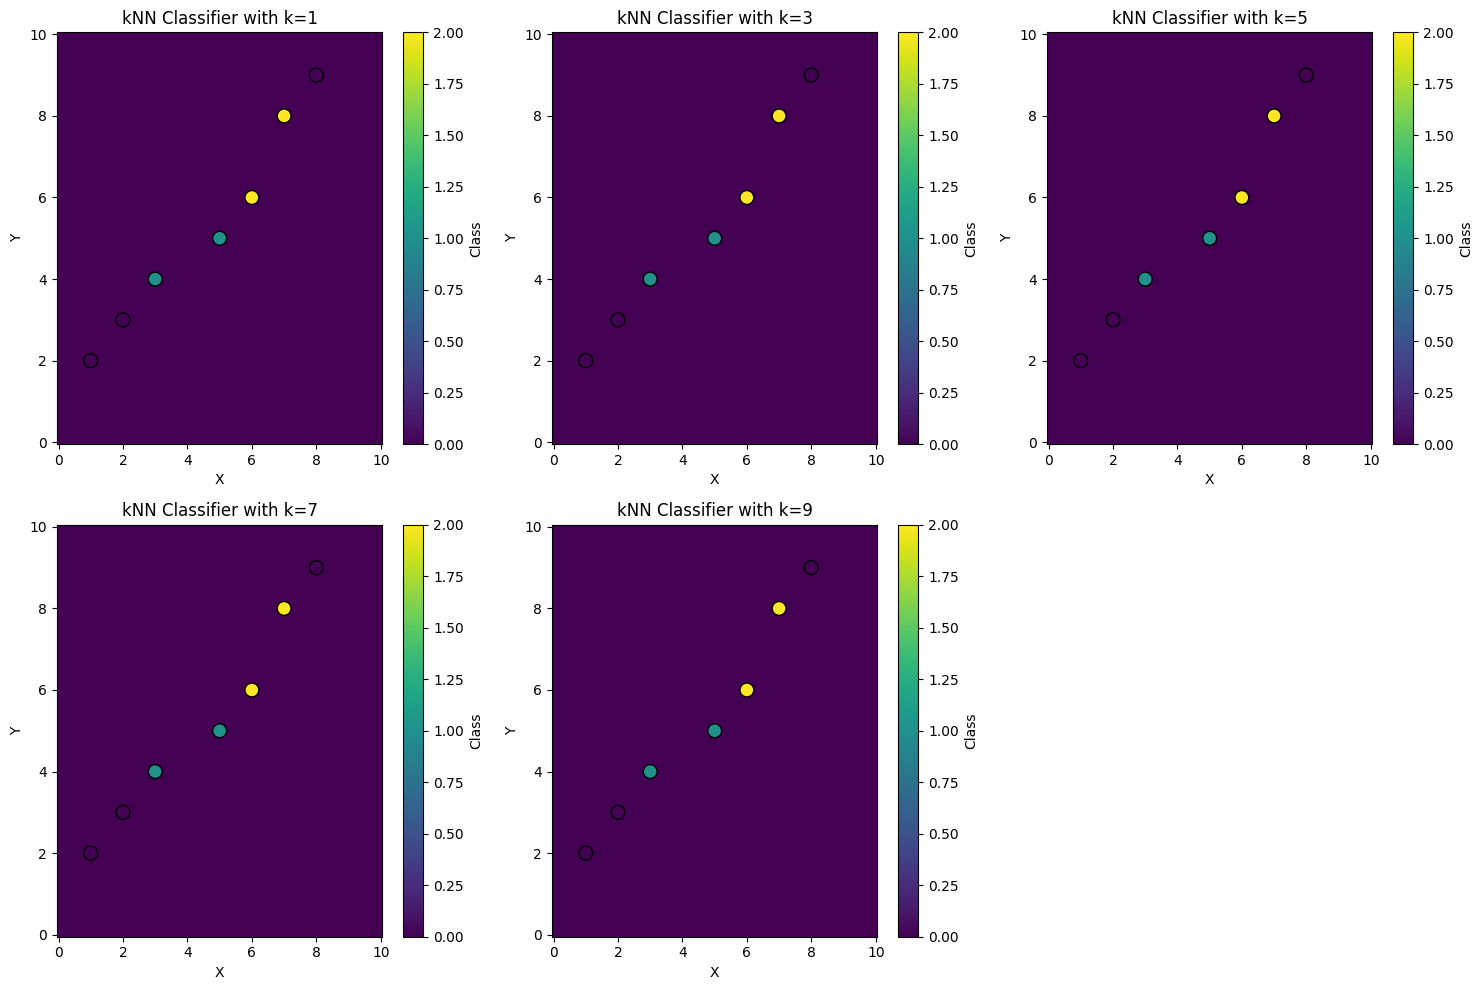

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Example training data (replace with your actual training data)
X_train = np.array([
    [1, 2], [2, 3], [3, 4], [5, 5], [6, 6], [7, 8], [8, 9]
])  # Example feature data
y_train = np.array([
    'Class0', 'Class0', 'Class1', 'Class1', 'Class2', 'Class2', 'Class0'
])  # Example labels

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Generate test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X, Y = np.meshgrid(x_values, y_values)
test_data = np.c_[X.ravel(), Y.ravel()]

# Define different values of k to evaluate
k_values = [1, 3, 5, 7, 9]

# Create plots for each k
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    # Create and train the kNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_encoded)

    # Classify the test data
    # predictions_encoded = knn.predict(test_data)

    # Reshape predictions to match the grid shape
    predicted_classes = predictions_encoded.reshape(X.shape)

    # Create a subplot for the current k
    plt.subplot(2, 3, i)
    plt.pcolormesh(X, Y, predicted_classes, shading='auto', cmap='viridis', edgecolors='none')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, edgecolor='k', cmap='viridis', marker='o', s=100, label='Training Data')
    plt.colorbar(label='Class')
    plt.title(f'kNN Classifier with k={k}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()

